In [ ]:
#Dataset from CuMiDa(Curated Microarray Database): "https://sbcb.inf.ufrgs.br/cumida#datasets"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Breast_GSE45827.csv")
data.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [3]:
data.shape

(151, 54677)

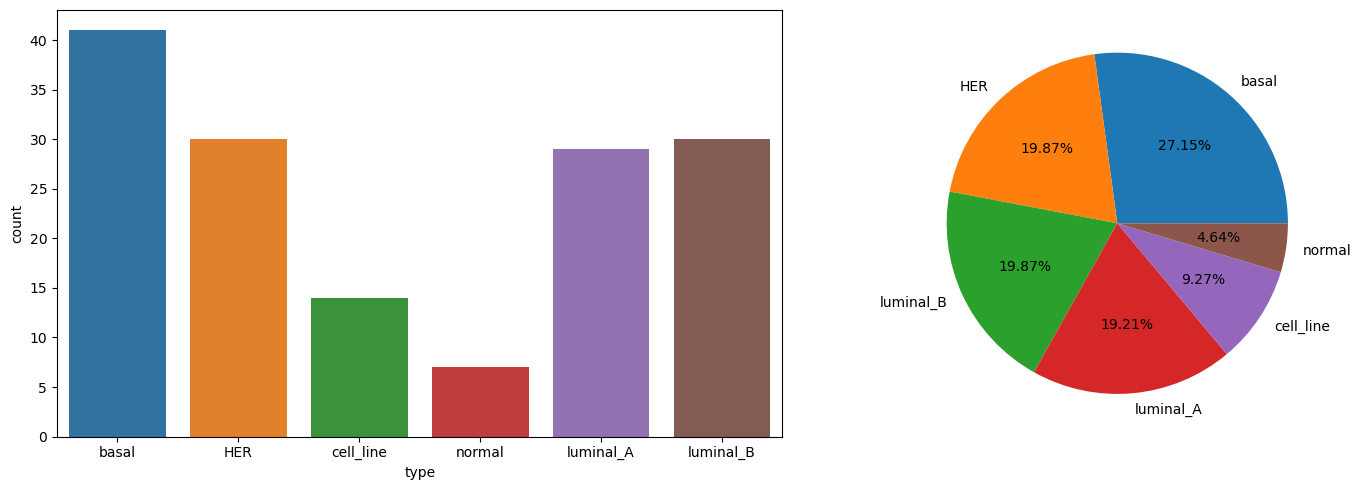

In [4]:
cluster = data.type.value_counts()
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = data['type'])
plt.subplot(1, 2, 2)
plt.pie(cluster, labels = cluster.keys(), autopct = "%.2f%%")
plt.tight_layout()
plt.show()

In [5]:
dt = data.dtypes
data.dtypes

samples              int64
type                object
1007_s_at          float64
1053_at            float64
117_at             float64
                    ...   
AFFX-ThrX-5_at     float64
AFFX-ThrX-M_at     float64
AFFX-TrpnX-3_at    float64
AFFX-TrpnX-5_at    float64
AFFX-TrpnX-M_at    float64
Length: 54677, dtype: object

In [6]:
dt = data.dtypes
data.dtypes
for column, dtype in dt.items():
    if dtype != 'float64':
        print("Non Float = ",column)

Non Float =  samples
Non Float =  type


In [7]:
data.isna().sum()
data.isna().sum().sum()

0

In [8]:
data.duplicated().sum()
data.duplicated().sum().sum()

0

In [9]:
x = data.drop(['samples', 'type'], axis = 'columns')
y = data['type']

In [10]:
#sampling Imbalance
print(f"Data Set:\n{pd.Series(y).value_counts()}\n")
#As we can see all classes dont have equal number of samples which will create bias in training
#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 3, k_neighbors = 3)
x_sm, y_sm = smote.fit_resample(x,y)
y_sm.value_counts()

Data Set:
basal        41
HER          30
luminal_B    30
luminal_A    29
cell_line    14
normal        7
Name: type, dtype: int64



basal        41
HER          41
cell_line    41
normal       41
luminal_A    41
luminal_B    41
Name: type, dtype: int64

In [11]:
#Encoding non numeric labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y)
y_encoded = label_encoder.transform(y)
labels = label_encoder.classes_
classes = np.unique(y_encoded)

In [12]:
print('Labels =',labels,'\nClasses =',classes)

Labels = ['HER' 'basal' 'cell_line' 'luminal_A' 'luminal_B' 'normal'] 
Classes = [0 1 2 3 4 5]


In [13]:
x.describe()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,...,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,10.338901,7.631910,6.224885,7.339248,3.185252,7.310240,5.323484,4.714095,7.787712,3.902061,...,12.359605,11.823386,14.018193,13.773030,7.621929,5.699042,6.185605,2.918774,3.624008,3.173868
std,0.613445,0.706464,0.645435,0.330827,0.158909,0.642091,0.294513,0.308550,1.648260,0.481294,...,0.318436,0.369859,0.253870,0.290556,0.857777,0.860841,0.953867,0.093126,0.145394,0.101907
min,7.505488,5.855968,4.763602,6.632206,2.760583,5.455736,4.646131,3.946065,3.866030,3.278896,...,11.650564,10.939760,13.419083,13.191191,5.729767,4.326227,4.301471,2.733497,3.299401,2.937393
25%,10.103030,7.166075,5.798087,7.105841,3.075873,6.874504,5.131931,4.466260,6.804510,3.628093,...,12.149550,11.592631,13.807282,13.523011,6.884862,4.967515,5.336542,2.861549,3.532740,3.109767
50%,10.416819,7.531673,6.235074,7.333426,3.187703,7.417113,5.274663,4.662957,7.912255,3.767997,...,12.321900,11.830756,14.002497,13.740376,7.795425,5.489450,6.209136,2.911734,3.615106,3.163205
75%,10.735117,8.053832,6.612291,7.513084,3.280416,7.760806,5.456686,4.941337,8.887997,4.046817,...,12.527235,12.021728,14.232589,14.028020,8.195458,6.449022,7.046721,2.961270,3.698539,3.229561
max,11.675109,9.627008,8.364749,8.374055,3.611630,8.569296,6.360765,5.893006,11.710498,6.826305,...,13.509037,13.119966,14.622678,14.482744,10.291243,8.112206,9.121638,3.322275,4.160823,3.451855


In [14]:
#Splitting the data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size = 0.2, random_state = 42)

In [15]:
#Data Scaling
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.fit_transform(x_test)

In [34]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [35]:
svc = SVC()
rf = RandomForestClassifier()
Log = LogisticRegression()
gb = GaussianNB()
knn = KNeighborsClassifier()

In [18]:
svc.fit(x_train_scaled, y_train)
svc.score(x_test_scaled, y_test)

0.9032258064516129

In [19]:
rf.fit(x_train_scaled, y_train)
rf.score(x_test_scaled, y_test)

0.9354838709677419

In [20]:
Log.fit(x_train_scaled, y_train)
Log.score(x_test_scaled, y_test)

C:\Users\chaud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9032258064516129

In [21]:
gb.fit(x_train_scaled, y_train)
gb.score(x_test_scaled, y_test)

0.8387096774193549

In [36]:
knn.fit(x_train_scaled, y_train)
knn.score(x_test_scaled, y_test)

0.7741935483870968

In [22]:
#selecting best hyperparameters for different models
from sklearn.model_selection import GridSearchCV
model_params = {
    'svm': {
        'model' : SVC(gamma = 'auto'),
        'params' : {
            'C' : [1,10,20,30,40],
            'kernel' : ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10,50,100,120,150]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [1,5,10,20,20]
        }
    },
    'Gaussian': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
        }
    }
}

score = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score = False)
    clf.fit(x_train_scaled, y_train)
    score.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
df = pd.DataFrame(score, columns = ['model', 'best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.958333,"{'C': 10, 'kernel': 'rbf'}"
1,random_forest,0.941667,{'n_estimators': 120}
2,logistic_regression,0.941667,{'C': 1}
3,Gaussian,0.900000,{'var_smoothing': 1e-09}


In [23]:
#K-fold cross-validation with fine tuned hyperparameters
#Here did a 5-fold cross validation 
from sklearn.model_selection import cross_val_score

cv1 = cross_val_score(SVC(kernel = 'rbf', C = 10, gamma = 'auto'), x_train_scaled, y_train, cv = 5 )
cv2 = cross_val_score(RandomForestClassifier(n_estimators = 150), x_train_scaled, y_train, cv = 5 )
cv3 = cross_val_score(LogisticRegression(C = 1,max_iter=1000), x_train_scaled, y_train, cv = 5 )

print('SVM :',np.average(cv1),'\nRandom Forest :',np.average(cv2),'\nLogistic Regression :',np.average(cv3))

SVM : 0.9583333333333334 
Random Forest : 0.9333333333333333 
Logistic Regression : 0.9333333333333333


In [28]:
#Test score for top best fitting model
final_model = SVC(kernel = 'rbf', C = 10, gamma = 'auto')
final_model.fit(x_train_scaled, y_train)
print('Test Score :',final_model.score(x_test_scaled, y_test))

Test Score : 0.9032258064516129


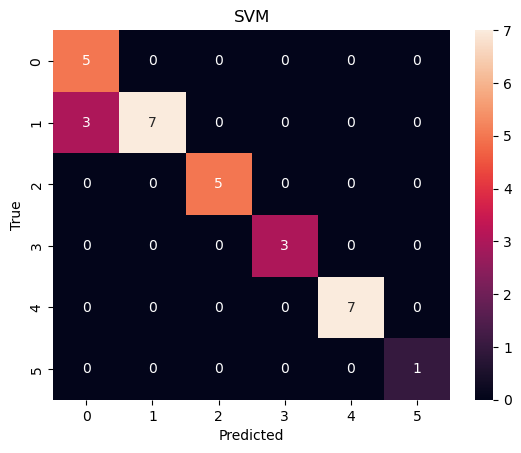

In [29]:
#Result Evaluation
from sklearn.metrics import confusion_matrix, classification_report
y_pred = final_model.predict(x_test_scaled)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("SVM")
plt.show()

In [40]:
#Classification Report
print('Classification Report - SVM:\n\n',classification_report(y_test, y_pred))

Classification Report - SVM:

               precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.70      0.82        10
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         1

    accuracy                           0.90        31
   macro avg       0.94      0.95      0.93        31
weighted avg       0.94      0.90      0.91        31



In [38]:
#Saving the model
import pickle
with open('SVM_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)